Simulation of moving bar with two cell types and delayed feedback
July 28, 2020 created by CKC
based on NF_MB_02 but with a smooth moving bar by using a stimulation with continuous position

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
%matplotlib inline

In [2]:
def K(x,s):
    return (np.exp(-(x/s)**2))/(s*np.sqrt(np.pi))

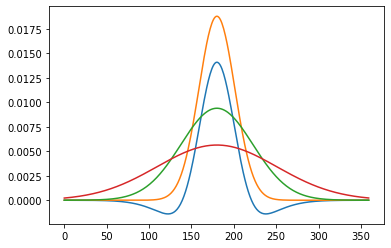

In [3]:
hw = 15

sigma_c = 30
sigma_h = 60
sigma_g = 100

klen = sigma_h*3
xx = np.arange(-klen,klen)

KC = K(xx,sigma_c)
KH = K(xx,sigma_h)
KG = K(xx,sigma_g)#/(sigma_g*np.sqrt(np.pi))
CS=KC-0.5*KH
plt.plot(CS)
plt.plot(KC)
plt.plot(KH)
plt.plot(KG)

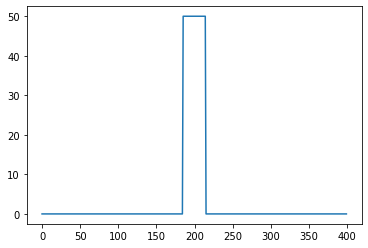

In [4]:
xlen = 400 #spatial extend of simulation
i0 = 200
s = np.zeros(xlen)
s[i0-hw:i0+hw] = 50
plt.plot(s)

In [5]:
# Guassian function with mean x0 and standard deviation sigma
def G(x,x0,sigma):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = np.exp(-((x[i]-x0)/sigma)**2)
    return(y)

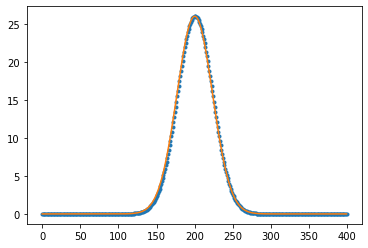

In [6]:
# macthing with Gussian profile with convoluted result
r = np.convolve(s,KC,'same')
altitude = max(r)
tempx = np.arange(xlen)
plt.plot(r,'.')

#Do some optimization, find best sigma ratio
distances = []
ratios = np.arange(1,50)*0.1
for ratio in ratios:
    temp_y = altitude*G(tempx,i0,sigma_c*ratio)
    distance = np.linalg.norm(temp_y-r)
    distances.append(distance)
distances = np.array(distances)
min_index = np.where(distances==min(distances))
tempy = altitude*G(tempx,i0,sigma_c*ratios[min_index]) # this form will be used for stimulation
plt.plot(tempy)

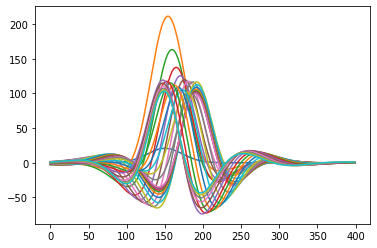

In [57]:
dt = 0.001

alpha = 80
beta = 2

k = 800
g = 1.5

pos_0 = 150
nstep = 1500
v = 100 # moving bar velocity
#v = 0

y = np.zeros(xlen) # cone cell output
z = np.zeros(xlen) # horizontal cell output
rz = np.zeros(xlen) # horizontal cell output
ry = np.convolve(y,KH,'same') # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)

speak = np.zeros(nstep)
rpeak = np.zeros(nstep)

stm = []
rsp = []
zts = []
tmp = []

pos = pos_0
for i in range(nstep):
    if i < 400:
        pos = pos + v*dt
    if i > 800 and i <1200:
        pos = pos - v*dt
    speak[i] = pos
    rs =  altitude*G(tempx,pos,sigma_c*ratios[min_index])
    
    
    for j in range(xlen):
        dyj =(-alpha*y[j]+k*(rs[j]-rz[j]))*dt
        dzj =(-beta*z[j]+g*y[j])*dt
        y[j] = y[j]+dyj
        z[j] = z[j]+dzj
        
    rz = np.convolve(z,KH,'same') # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    ry = np.convolve(y,KH,'same') # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)

    
    maxpos = np.argmax(y)
    rpeak[i]= maxpos
    
    stm.append(rs.copy())
    rsp.append(y.copy())
    zts.append(z.copy())
    
    if i%50 == 0:
        #plt.plot(y[maxpos-50:maxpos+50])
        plt.plot(y)
        tmp.append(y)
        #plt.plot(rs/7)

(-51, 349)

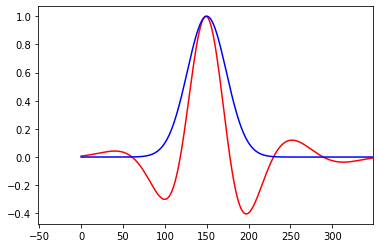

In [58]:
plt.plot(y/np.max(y),'r')
plt.plot(rs/np.max(rs),'b')
#plt.plot(z)
plt.xlim([maxpos-200,maxpos+200])

In [59]:
# activation function
def A(x,theta):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]- theta>0:
            y[i]= x[i]-theta
    return(y)

(49, 249)

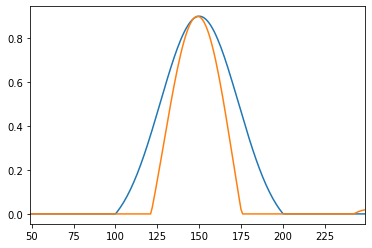

In [60]:
# shown with activatin function
rrs = rs/np.max(rs)
yy = y/np.max(y)
plt.plot(A(rrs,0.1))
plt.plot(A(yy,0.1))
plt.xlim([maxpos-100,maxpos+100])

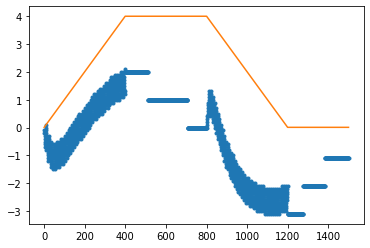

In [61]:
# difference between stimualtion and response peak
plt.plot(rpeak-speak,'.')
plt.plot((speak-pos_0)/10)
#plt.ylim([0,15])
#plt.xlim([350,450])

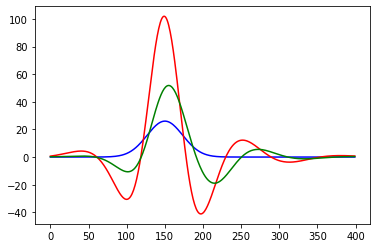

In [63]:
# spatial distribution of cells at final state
plt.plot(rs,'b') # stimualtion
plt.plot(y,'r')  # cone cell
plt.plot(z,'g')  # horizontal cell


10


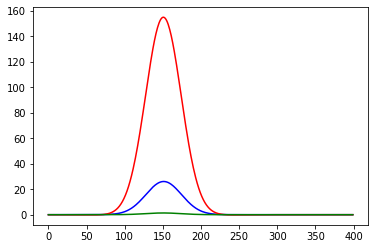

200


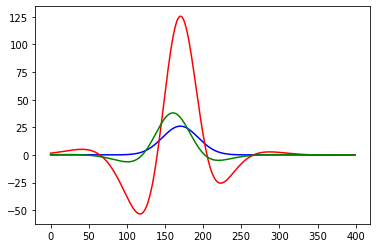

400


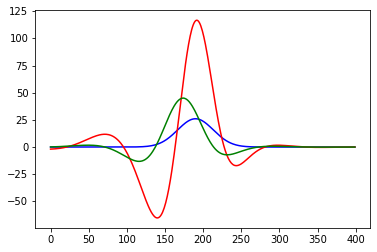

450


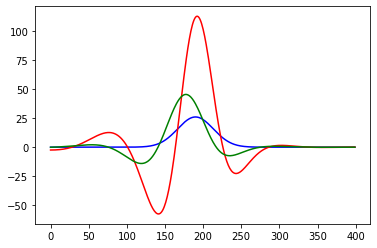

500


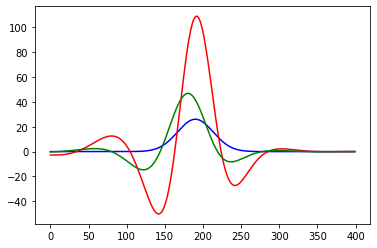

600


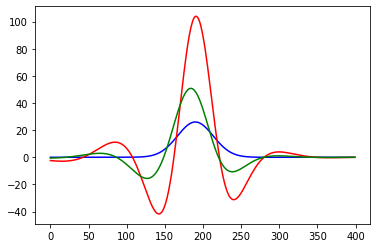

700


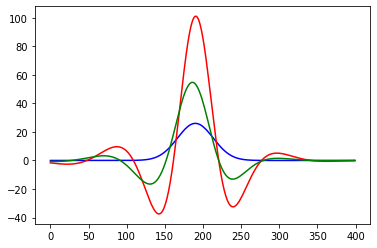

1199


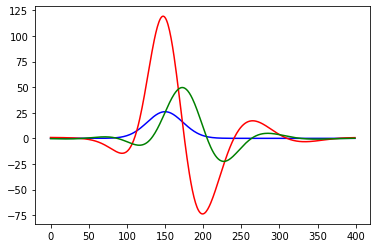

1499


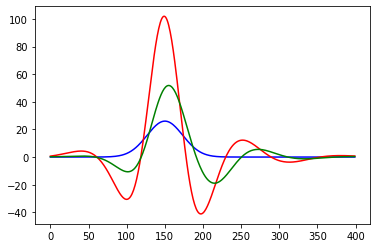

In [64]:
# snapshot at different time
for index in [10, 200, 400, 450, 500, 600, 700, 1199, 1499]:
    plt.figure()
    print(index)
    plt.plot(stm[index],'b')
    plt.plot(rsp[index],'r')
    plt.plot(zts[index],'g')
    plt.show()


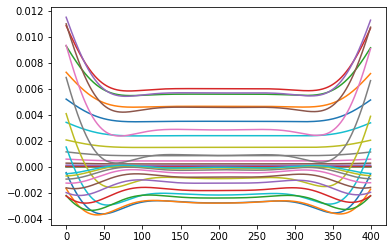

In [83]:
nstep = 1500

pos_0 = 0
y = np.zeros(xlen) # cone cell output
z = np.zeros(xlen) # horizontal cell output
rz = np.zeros(xlen) # horizontal cell output
ry = np.convolve(y,KH,'same') # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)

speak = np.zeros(nstep)
speak = K(np.arange(nstep)-int(nstep/2),nstep/6)
rpeak = np.zeros(nstep)

stm = []
rsp = []
zts = []
tmp = []


for i in range(nstep):


    rs =  np.ones(xlen)*speak[i]
    
    
    for j in range(xlen):
        dyj =(-alpha*y[j]+k*(rs[j]-rz[j]))*dt
        dzj =(-beta*z[j]+g*y[j])*dt
        y[j] = y[j]+dyj
        z[j] = z[j]+dzj
        
    rz = np.convolve(z,KH,'same') # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    ry = np.convolve(y,KH,'same') # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)

    

    rpeak[i]= y[int(xlen/2)]
    
    stm.append(rs.copy())
    rsp.append(y.copy())
    zts.append(z.copy())
    
    if i%50 == 0:
        #plt.plot(y[maxpos-50:maxpos+50])
        plt.plot(y)
        tmp.append(y)
        #plt.plot(rs/7)

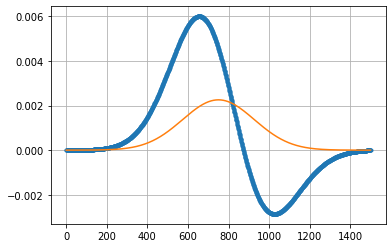

In [84]:
plt.plot(rpeak,'.')
plt.plot((speak))
plt.grid()